Notebook to train and test a convolutional head and upscaler for use with the bridge network. These networks are trained on the Kuzushiji MNIST (KMNIST) dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras import regularizers

In [2]:
from data import *
from utils import *

In [3]:
from models import Conv_AE

In [4]:
limit_gpus()
set_gpu(0)

In [5]:
n_batch = 128

In [6]:
ds_train, ds_test, ds_info = load_dataset("kmnist", n_batch)

In [7]:
input_shape = ds_info.features['image'].shape

In [8]:
num_classes = ds_info.features['label'].num_classes

In [9]:
ae = Conv_AE(input_shape, num_classes)

In [10]:
ae.train(ds_train, 6, 200)

Training loss 1.4918664
Training loss 0.3148255
Training loss 0.24696322
Training loss 0.14931771
Training loss 0.14204346
Training loss 0.19176805
Training loss 0.13541532
Training loss 0.13853642
Training loss 0.122931525
Training loss 0.11575184
Training loss 0.12316375
Training loss 0.13252604
Training loss 0.13481045
Training loss 0.10820909
Training loss 0.14354718
Training loss 0.092416465
Training loss 0.11117796
Training loss 0.14063282


[1.4918664,
 1.4651116,
 1.4196752,
 1.3766314,
 1.333602,
 1.2804798,
 1.2287225,
 1.2195579,
 1.145961,
 1.0931121,
 1.0639553,
 1.0368276,
 0.9404921,
 0.92158735,
 0.88670087,
 0.97208554,
 0.8106144,
 0.8834286,
 0.9286066,
 0.8869386,
 0.78667676,
 0.83135456,
 0.76872635,
 0.7704412,
 0.66590136,
 0.7336887,
 0.7045769,
 0.7667099,
 0.7414972,
 0.7345041,
 0.6642665,
 0.73793954,
 0.745849,
 0.59373516,
 0.58783853,
 0.697719,
 0.73265827,
 0.6380727,
 0.66526914,
 0.65655,
 0.64831406,
 0.7094271,
 0.5962439,
 0.6399964,
 0.52693975,
 0.6045858,
 0.5985396,
 0.60961,
 0.59695125,
 0.5709413,
 0.5818272,
 0.5209886,
 0.5840471,
 0.54543024,
 0.4980629,
 0.59344375,
 0.57221276,
 0.55874854,
 0.53959894,
 0.48775107,
 0.551646,
 0.5727739,
 0.5655035,
 0.5741347,
 0.62233716,
 0.50857437,
 0.4660383,
 0.5885965,
 0.55616426,
 0.42030805,
 0.4785347,
 0.53899604,
 0.528713,
 0.4821893,
 0.5054693,
 0.49264365,
 0.5255829,
 0.40710595,
 0.5275747,
 0.52689886,
 0.47449017,
 0.47068

In [11]:
ae.accuracy_class(ds_test)

0.923

In [12]:
(x,y) = next(iter(ds_train))

In [13]:
xh = ae.reconstruct(x)

In [29]:
def plot_comparison(x, xh, ind):
    plt.subplot(1,2,1)
    plt.imshow(x[ind,...])
    plt.title("Original")
    plt.subplot(1,2,2)
    plt.imshow(xh[ind,...])
    plt.title("Reconstruction")

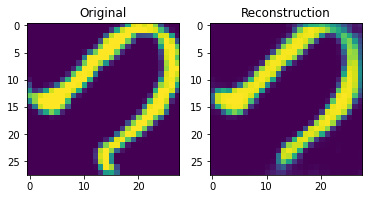

In [30]:
plot_comparison(x, xh, 0)

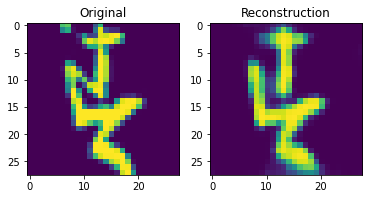

In [31]:
plot_comparison(x, xh, 1)

In [17]:
ae.conv_head.save("models/ae_conv_head.h5")

In [18]:
ae.inv_head.save("models/ae_inv_head.h5")